# Academy: Practicum Visualizing Galactic Chemical Evolution, Birth Radius, and Exoplanets

In [16]:
from pathlib import Path
import matplotlib.pyplot as plt

root_path = Path.cwd()
while not (root_path / "topics").exists():
    root_path = root_path.parent

topic_root = root_path / "topics/TOP_0001_exoplanet_birth_radius"
FIG_DIR = topic_root / "figures" / "en"
FIG_DIR.mkdir(parents=True, exist_ok=True)

def save_fig(name: str, fig=None, dpi: int = 200):
    """
    Save a matplotlib figure as PNG into FIG_DIR.
    Usage:
      - save_fig("Figure_1")            # saves current active figure
      - save_fig("Figure_1", fig=fig)   # saves explicit figure (recommended)
    """
    if not name.lower().endswith(".png"):
        name += ".png"

    if fig is None:
        fig = plt.gcf()  # get current figure

    out = FIG_DIR / name
    fig.savefig(out, dpi=dpi, bbox_inches="tight", facecolor="white")
    print("Saved:", out, "| size:", out.stat().st_size, "bytes")

print("FIG_DIR:", FIG_DIR)

FIG_DIR: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en


## 1. Goal of the practicum
The goal of this practicum is to learn how to visually connect:
- Galactic Chemical Evolution (GCE),
- stellar birth radius (r₍birth₎),
- stellar migration,
and the observed distribution of exoplanets.

By the end of the practicum, we will have a set of plots that:
- explain both scientific papers,
- can be interpreted intuitively, without equations,
- can be directly reused in the Academy, Celestial Chronicles, and Astro Minute formats.

# Figure 1. Distribution of host stars by effective temperature for both data samples

## Purpose of the figure

This figure is constructed to compare the effective temperature ($T_{\mathrm{eff}}$) distributions of planet-hosting stars drawn from two independent samples: SWEET-Cat and HARPS-GTO. The goal is to assess whether both datasets probe comparable stellar populations in terms of spectral type and evolutionary stage, which is a necessary prerequisite for any meaningful comparative analysis of planetary properties and Galactic trends.

## Data used

Data used

For both samples, we use spectroscopically derived stellar effective temperatures provided in homogeneous form within each catalogue. In the case of SWEET-Cat, only stars with consistent spectroscopic parameters $(SWFlag = 1)$ are considered. For HARPS-GTO, the temperatures are taken directly from the published stellar parameter tables, distinguishing between planet-hosting stars and stars without detected planets.

## Method

The figure is constructed by plotting normalized histograms of $T_{\mathrm{eff}}$ for the two datasets. No evolutionary model assumptions are involved at this stage; the plot relies solely on directly observed stellar parameters. The same temperature range and binning scheme are applied to both samples to allow a direct visual comparison.




## Code explanation

What this code does

### 1) Imports and helper functions
The code starts by importing standard libraries for data handling (pandas), plotting (matplotlib), and online catalogue access (astroquery.vizier). Two small helper functions are defined:
	•	canon_name() standardizes stellar names into a canonical form, allowing robust cross-matching between different catalogues despite differences in formatting or notation.
	•	pick_col() selects the appropriate column containing host star names in the NEA table, accounting for variations in column naming between different data releases.

### 2) Project root detection and data paths
The script automatically locates the project root directory by searching for the topics/ folder and constructs relative paths to all required data files. This avoids hard-coded absolute paths and ensures portability across different systems.

### 3) Loading and preparing the SWEET-Cat sample (left panel)
The SWEET-Cat catalogue is loaded from a local CSV file. Only stars with homogeneous spectroscopic parameters (SWFlag == 1) are selected. The analysis is restricted to the effective temperature (Teff) and surface gravity (Logg), with rows containing missing or non-physical values removed. This produces a clean sample of planet-hosting stars for the left panel of the figure.

### 4) Loading and preparing the HARPS-GTO sample from Vizier (right panel)
The HARPS-GTO stellar sample is retrieved directly from the Vizier service using the published catalogue identifier. As for SWEET-Cat, stars with missing or non-physical values of Teff and logg are excluded.

### 5) Identifying host and single stars in HARPS-GTO
To distinguish between stars with and without detected planets in the HARPS-GTO sample, the NASA Exoplanet Archive (NEA) is used as a reference list of known planet hosts. Stellar names from HARPS-GTO are canonicalized and cross-matched against NEA host names. Stars with a match are classified as planet hosts, while the remainder are treated as single stars.

### 6) Construction and export of Figure 1
The final figure consists of two scatter plots:
	•	the left panel shows SWEET-Cat host stars (blue points);
	•	the right panel shows HARPS-GTO stars, with single stars in green and planet-hosting stars in orange.

Both axes are inverted to follow the conventional presentation of Kiel (log g–T_{\rm eff}) diagrams. The figure is then saved as Figure_1.png using the standardized save_fig() helper, making it available for inclusion in other notebooks and documents.


SWEET: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/raw/sweetcat.csv exists: True
NEA:   /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/raw/nea_ps_default_flag_1.csv exists: True
NEA host column: hostname unique hosts: 4524
HARPS total: 1111 hosts: 170 single: 941
Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_1.png | size: 279382 bytes


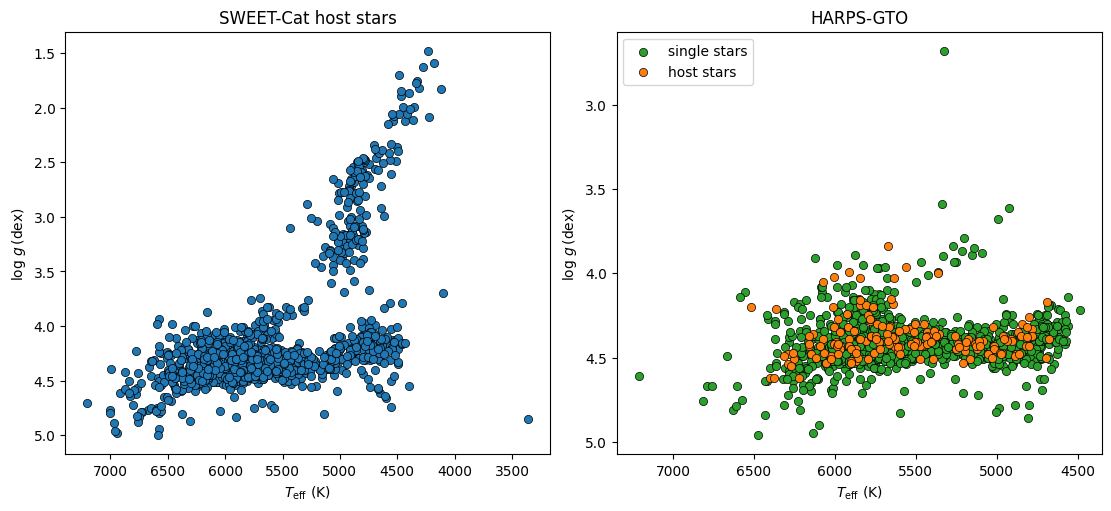

In [17]:
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier

# ---------- helpers ----------
def canon_name(x: str) -> str:
    """Canonicalize star/host names for loose matching."""
    if pd.isna(x):
        return ""
    s = str(x).strip().lower()
    s = s.replace("–", "-").replace("—", "-")
    s = re.sub(r"\(.*?\)", "", s)          # remove parenthetical
    s = re.sub(r"\s+", " ", s)             # normalize whitespace
    s = re.sub(r"[^a-z0-9+\- ]", "", s)    # keep basic chars
    s = s.replace(" ", "")                 # remove spaces (important for 'hd 1234')
    return s

def pick_col(df, candidates):
    for c in candidates:
        if c in df.columns:
            return c
    return None

# ---------- paths (project root search) ----------
cwd = Path.cwd()
project_root = None
for parent in [cwd] + list(cwd.parents):
    if (parent / "topics").exists():
        project_root = parent
        break
if project_root is None:
    raise RuntimeError("Project root not found (folder 'topics' not found).")

topic_root = project_root / "topics/TOP_0001_exoplanet_birth_radius"
sweet_path = topic_root / "data/raw/sweetcat.csv"
nea_path   = topic_root / "data/raw/nea_ps_default_flag_1.csv"

print("SWEET:", sweet_path, "exists:", sweet_path.exists())
print("NEA:  ", nea_path,   "exists:", nea_path.exists())

# ---------- load SWEET-Cat (left panel) ----------
sweet = pd.read_csv(sweet_path)
sweet_df = sweet[sweet["SWFlag"] == 1].copy()
sweet_df = sweet_df[["Teff", "Logg"]].dropna()
sweet_df = sweet_df[(sweet_df["Teff"] > 0) & (sweet_df["Logg"] > 0)]

# ---------- load HARPS-GTO from Vizier ----------
Vizier.ROW_LIMIT = -1
tabs = Vizier.get_catalogs("J/A+A/545/A32")
harps = tabs[0].to_pandas()  # table45
# columns: ['Star','Teff','logg',...,'SimbadName',...]
harps = harps.dropna(subset=["Teff", "logg"])
harps = harps[(harps["Teff"] > 0) & (harps["logg"] > 0)].copy()

# ---------- load NEA and build host star set ----------
nea = pd.read_csv(nea_path)
host_col = pick_col(nea, ["hostname", "pl_hostname", "star_name", "host_name", "host", "sy_name"])
if host_col is None:
    raise ValueError(f"Не нашёл колонку имени хоста в NEA. Columns: {list(nea.columns)}")

nea_hosts = set(nea[host_col].dropna().map(canon_name).tolist())
print("NEA host column:", host_col, "unique hosts:", len(nea_hosts))

# ---------- mark HARPS hosts by name overlap with NEA ----------
# Prefer SimbadName, fallback to Star
harps["name1"] = harps["SimbadName"].map(canon_name)
harps["name2"] = harps["Star"].map(canon_name)

harps["is_host"] = harps["name1"].isin(nea_hosts) | harps["name2"].isin(nea_hosts)

harps_host   = harps[harps["is_host"]].copy()
harps_single = harps[~harps["is_host"]].copy()

print("HARPS total:", len(harps), "hosts:", len(harps_host), "single:", len(harps_single))

# ---------- plot 2 panels with final colors ----------
fig, axes = plt.subplots(1, 2, figsize=(11, 5), constrained_layout=True)

# --- Left panel: SWEET-Cat (blue) ---
axes[0].scatter(
    sweet_df["Teff"], sweet_df["Logg"],
    s=35, color="tab:blue", edgecolors="k", linewidths=0.5
)
axes[0].set_title("SWEET-Cat host stars")
axes[0].set_xlabel(r"$T_{\rm eff}$ (K)")
axes[0].set_ylabel(r"$\log\, g\,({\rm dex})$")

# --- Right panel: HARPS-GTO ---
axes[1].scatter(
    harps_single["Teff"], harps_single["logg"],
    s=35, color="tab:green", edgecolors="k", linewidths=0.5,
    label="single stars"
)
axes[1].scatter(
    harps_host["Teff"], harps_host["logg"],
    s=35, color="tab:orange", edgecolors="k", linewidths=0.5,
    label="host stars"
)

axes[1].set_title("HARPS-GTO")
axes[1].set_xlabel(r"$T_{\rm eff}$ (K)")
axes[1].set_ylabel(r"$\log\, g\,({\rm dex})$")
axes[1].legend(loc="upper left")

# --- Paper-style axes ---
for ax in axes:
    ax.invert_xaxis()
    ax.invert_yaxis()

save_fig("Figure_1")
plt.show()

*Figure 1. The logg–𝑇eff diagram for SWEET-Cat host stars (left panel) and for HARPS-GTO host and single stars (right panel).*

*Stellar parameters for planet-hosting stars were taken from the SWEET-Cat catalogue (locally stored version), while the HARPS-GTO stellar sample was retrieved directly from the VizieR service using astroquery. The classification of HARPS-GTO stars into hosts and single stars was performed by cross-matching with the NASA Exoplanet Archive.*

## Interpretation and conclusions

The resulting distributions show that both samples are dominated by FGK-type stars, with effective temperatures typically ranging from approximately 4500 K to 6500 K. This reflects the well-known observational bias of radial-velocity surveys, which preferentially target slowly rotating, spectroscopically stable stars. Importantly, the substantial overlap between the two distributions indicates that SWEET-Cat and HARPS-GTO probe similar stellar populations in terms of effective temperature. This justifies their joint use in subsequent analyses and ensures that any differences observed later are unlikely to be driven by temperature-related selection effects.


---

# Figure 2. [Fe/H] distributions for SWEET-Cat host stars and HARPS-GTO stars

## Purpose of the figure

This figure illustrates the distributions of stellar metallicity $[\mathrm{Fe/H}]$ for two independent samples: planet-hosting stars from SWEET-Cat and both host and single stars from HARPS-GTO. The primary goal is to examine how metallicity differs between these populations and to assess the role of chemical composition in planet occurrence.

Metallicity is a key parameter in planet formation theories, particularly in the core-accretion framework, where higher metal content in the protoplanetary disk enhances the efficiency of forming massive planetary cores. Therefore, comparing $[\mathrm{Fe/H}]$ distributions provides a direct observational link between stellar chemistry and the likelihood of hosting planets.

## Data used

For SWEET-Cat, we use spectroscopically derived metallicities obtained in a homogeneous way, restricting the sample to stars with reliable parameters $(SWFlag = 1)$. For HARPS-GTO, metallicities are taken from the published stellar catalogue, with stars separated into planet hosts and stars without detected planets using cross-matching with the NASA Exoplanet Archive.

## Method

The figure is constructed using normalized histograms of $[\mathrm{Fe/H}]$. Identical binning and metallicity ranges are applied to all subsamples to allow a direct comparison. No evolutionary models or age estimates are involved at this stage; the analysis relies purely on observed stellar abundances.

## What the code does (Figure 2)

### 1) Loading and cleaning the stellar samples
The code loads metallicity measurements for SWEET-Cat from a local CSV file and retrieves HARPS-GTO metallicities from the Vizier catalogue. In both cases, stars with missing or non-physical $[\mathrm{Fe/H}]$ values are excluded to ensure clean and comparable samples.

### 2) Classification of HARPS-GTO stars
Using the NASA Exoplanet Archive as a reference list of known planet hosts, HARPS-GTO stars are classified into host and single-star subsamples through name-based cross-matching. This enables a direct comparison between stars with and without detected planets within the same spectroscopic survey.

### 3) Construction of metallicity distributions
Normalized histograms of $[\mathrm{Fe/H}]$ are computed separately for:

	- SWEET-Cat host stars,
    - HARPS-GTO host stars,
    - HARPS-GTO single stars.

The same binning and axis limits are applied to all subsamples to ensure that differences in shape and peak position reflect intrinsic population properties rather than plotting choices.

### 4) Visualization and export
The figure is rendered as a two-panel plot: SWEET-Cat on the left and HARPS-GTO on the right. Distinct colors are used to highlight host and single-star populations. The final plot is saved as Figure_2.png using the standardized save_fig() function, allowing it to be reused consistently across notebooks and derived documents.

Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_2.png | size: 63673 bytes


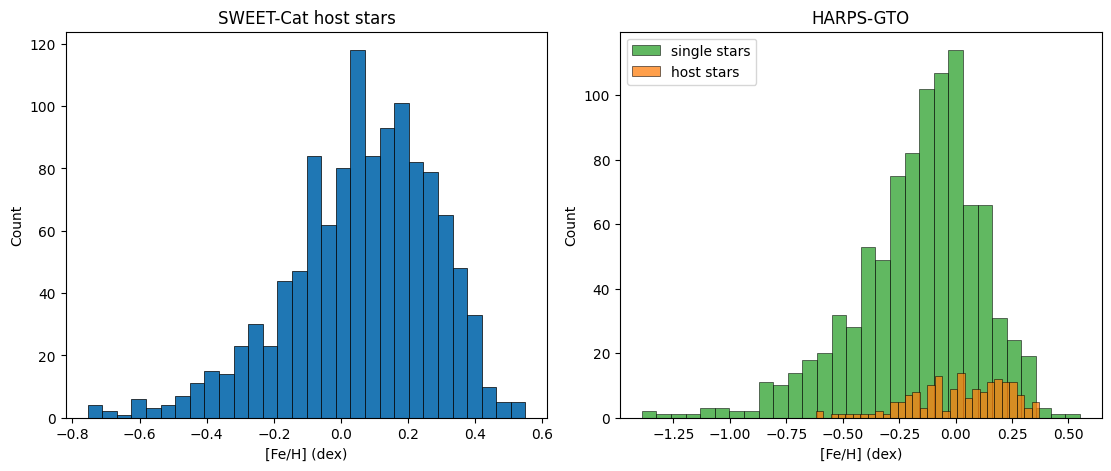

SWEET hosts: 1183
HARPS host: 170 HARPS single: 941


In [18]:
import re
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier

# ---------- helpers ----------
def canon_name(x: str) -> str:
    if pd.isna(x):
        return ""
    s = str(x).strip().lower()
    s = s.replace("–", "-").replace("—", "-")
    s = re.sub(r"\(.*?\)", "", s)
    s = re.sub(r"\s+", " ", s)
    s = re.sub(r"[^a-z0-9+\- ]", "", s)
    s = s.replace(" ", "")
    return s

def find_project_root():
    cwd = Path.cwd()
    for parent in [cwd] + list(cwd.parents):
        if (parent / "topics").exists():
            return parent
    raise RuntimeError("Project root not found (folder 'topics' not found).")

# ---------- load SWEET + NEA ----------
project_root = find_project_root()
topic_root = project_root / "topics/TOP_0001_exoplanet_birth_radius"
sweet_path = topic_root / "data/raw/sweetcat.csv"
nea_path   = topic_root / "data/raw/nea_ps_default_flag_1.csv"

sweet = pd.read_csv(sweet_path)
nea   = pd.read_csv(nea_path)

sweet_hosts = sweet[sweet["SWFlag"] == 1].copy()
sweet_hosts = sweet_hosts[["Teff", "Logg", "[Fe/H]"]].dropna()

# NEA host name column (обычно hostname)
host_col = None
for c in ["hostname", "pl_hostname", "sy_name", "star_name", "host_name", "host"]:
    if c in nea.columns:
        host_col = c
        break
if host_col is None:
    raise ValueError(f"NEA host-name column not found. NEA columns: {list(nea.columns)}")

nea_hosts = set(nea[host_col].dropna().map(canon_name).tolist())

# ---------- load HARPS from Vizier ----------
Vizier.ROW_LIMIT = -1
harps = Vizier.get_catalogs("J/A+A/545/A32")[0].to_pandas()  # table45
# columns include: Teff, logg, [Fe/H], Star, SimbadName

harps = harps.dropna(subset=["Teff", "logg", "[Fe/H]"]).copy()
harps["name1"] = harps["SimbadName"].map(canon_name)
harps["name2"] = harps["Star"].map(canon_name)
harps["is_host"] = harps["name1"].isin(nea_hosts) | harps["name2"].isin(nea_hosts)

harps_host   = harps[harps["is_host"]]
harps_single = harps[~harps["is_host"]]

# ---------- plot: [Fe/H] histograms ----------
fig, axes = plt.subplots(1, 2, figsize=(11, 4.6), constrained_layout=True)

bins = 30  # можно 25-40; 30 обычно хорошо

# Left: SWEET-Cat hosts
axes[0].hist(sweet_hosts["[Fe/H]"], bins=bins, edgecolor="k", linewidth=0.5)
axes[0].set_title("SWEET-Cat host stars")
axes[0].set_xlabel("[Fe/H] (dex)")
axes[0].set_ylabel("Count")

# Right: HARPS-GTO single vs host
axes[1].hist(harps_single["[Fe/H]"], bins=bins, edgecolor="k", linewidth=0.5,
             alpha=0.75, label="single stars")
axes[1].hist(harps_host["[Fe/H]"], bins=bins, edgecolor="k", linewidth=0.5,
             alpha=0.75, label="host stars")

# перекрасим под твою схему (зелёный/оранжевый)
# (matplotlib по умолчанию красит сам; чтобы строго как надо — зададим цвет)
axes[1].cla()
axes[1].hist(harps_single["[Fe/H]"], bins=bins, color="tab:green",
             edgecolor="k", linewidth=0.5, alpha=0.75, label="single stars")
axes[1].hist(harps_host["[Fe/H]"], bins=bins, color="tab:orange",
             edgecolor="k", linewidth=0.5, alpha=0.75, label="host stars")

axes[1].set_title("HARPS-GTO")
axes[1].set_xlabel("[Fe/H] (dex)")
axes[1].set_ylabel("Count")
axes[1].legend(loc="upper left")

save_fig("Figure_2")
plt.show()

print("SWEET hosts:", len(sweet_hosts))
print("HARPS host:", len(harps_host), "HARPS single:", len(harps_single))

*Figure 2. [Fe/H] distributions for SWEET-Cat host stars (left panel) and for HARPS-GTO host and single stars (right panel).*

## Interpretation and conclusions

The distributions clearly show that planet-hosting stars are, on average, more metal-rich than stars without detected planets. This trend is visible in both catalogues and is especially pronounced for the HARPS-GTO sample, where host stars are systematically shifted toward higher $[\mathrm{Fe/H}]$ compared to single stars. The strong overlap between SWEET-Cat and HARPS-GTO host-star distributions further demonstrates the consistency of the two datasets. Overall, this figure provides observational confirmation of the well-established planet–metallicity correlation and motivates the later use of $[\mathrm{Fe/H}]$ as a tracer of Galactic chemical conditions at the time of planet formation.

---

# Figure 3. Age distributions of planet-hosting and non-host stars

## Purpose of the figure

This figure presents the stellar age distributions for planet-hosting stars and, where applicable, stars without detected planets. Its purpose is to investigate how planet occurrence relates to stellar age and to explore whether planetary systems preferentially form at specific epochs of Galactic history or persist across a wide range of ages.

Stellar age provides a temporal dimension that complements metallicity-based analyses, allowing us to connect planet formation to the long-term evolution of the Galactic disk and its chemical enrichment.

## Data used

Ages are derived for stars in the SWEET-Cat sample using grid-based isochrone fitting with MIST stellar evolutionary models. The analysis relies on spectroscopic effective temperatures and surface gravities, combined with metallicity measurements. Only stars with successful age determinations are included. To avoid known edge effects and saturation in isochrone fitting, ages are restricted to a physically meaningful range (0.1–13.5 Gyr).

For comparison, HARPS-GTO stars are separated into planet hosts and single stars based on cross-matching with the NASA Exoplanet Archive.

## Method

The figure is constructed using normalized histograms of stellar age. Identical binning and age ranges are applied to all subsamples to ensure a consistent comparison. The age estimates are treated statistically rather than individually, emphasizing population-level trends rather than precise ages of individual stars.


## What the code does (Figure 3)

### 1) Loading age estimates and quality filtering
The code loads the precomputed age catalogue produced in earlier steps of the practicum. Only stars with successful isochrone fits are retained, and ages are restricted to the adopted physical range to remove edge effects associated with grid-based fitting.

### 2) Sample separation
Stars are grouped into planet-hosting and non-host subsamples using the same host classification scheme employed for previous figures. This ensures methodological consistency across the practicum.

### 3) Construction of age distributions
Normalized histograms of stellar age are computed for each subsample using the same binning and axis limits. This allows direct visual comparison of the overall shapes and peaks of the age distributions.

### 4) Visualization and export
The resulting age distributions are displayed in a publication-style figure with clear labeling and consistent styling. The final plot is saved as Figure_3.png using the standard save_fig() function, making it available for inclusion in other notebooks and downstream analyses.


Input : /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/raw/sweetcat.csv
Output: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/sweetcat_ages_grid.csv
Stars eligible: 1183
Already done (fit_ok=True): 1183
To compute now: 0


SWEET-Cat grid age fitting: 0star [00:00, ?star/s]


Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/data/processed/sweetcat_ages_grid.csv
Total saved: 1183
Success: 1183  Fail: 0
Elapsed: 0.0 s  | avg per star this run: 0.024 s

Age summary (successful only):
count    1183.000000
mean        7.420771
std         6.983473
min         0.019953
25%         1.584893
50%         5.011872
75%        12.589254
max        19.952623
Name: age_gyr, dtype: float64

Top errors:
Series([], Name: error, dtype: int64)
Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_3.png | size: 37142 bytes


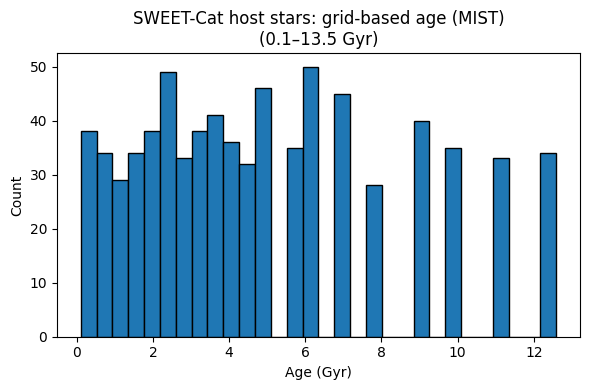

In [20]:
import numpy as np
import pandas as pd
from pathlib import Path
from time import perf_counter
from isochrones.mist import MIST_Isochrone
import matplotlib.pyplot as plt


try:
    from tqdm.auto import tqdm
except ImportError:
    def tqdm(x, **kwargs): return x

# ---------- helpers ----------
def find_project_root():
    cwd = Path.cwd()
    for p in [cwd] + list(cwd.parents):
        if (p / "topics").exists():
            return p
    raise RuntimeError("Project root not found (folder 'topics' not found).")

def num_series(s):
    return pd.to_numeric(s, errors="coerce")

# ---------- paths ----------
root_path  = find_project_root()
topic_root = root_path / "topics/TOP_0001_exoplanet_birth_radius"
sweet_path = topic_root / "data/raw/sweetcat.csv"
out_dir    = topic_root / "data/processed"
out_dir.mkdir(parents=True, exist_ok=True)
out_path   = out_dir / "sweetcat_ages_grid.csv"

print("Input :", sweet_path)
print("Output:", out_path)

# ---------- load SWEET-Cat ----------
sweet = pd.read_csv(sweet_path)

df = sweet[sweet["SWFlag"] == 1].copy()

# numeric coercion
for c in ["Teff","eTeff","Logg","eLogg","[Fe/H]","e[Fe/H]"]:
    df[c] = num_series(df[c])

df = df.dropna(subset=["Name","Teff","Logg","[Fe/H]"]).copy()

# floors (as in your pipeline)
df["eTeff"]   = df["eTeff"].fillna(60.0).clip(lower=60.0)
df["eLogg"]   = df["eLogg"].fillna(0.10).clip(lower=0.10)
df["e[Fe/H]"] = df["e[Fe/H]"].fillna(0.04).clip(lower=0.04)

print("Stars eligible:", len(df))

# ---------- resume ----------
done_ok = set()
if out_path.exists():
    prev = pd.read_csv(out_path)
    if "fit_ok" in prev.columns:
        done_ok = set(prev.loc[prev["fit_ok"] == True, "Name"].astype(str))
    print("Already done (fit_ok=True):", len(done_ok))

todo = df[~df["Name"].astype(str).isin(done_ok)].copy()
print("To compute now:", len(todo))

# ---------- load grid once ----------
iso = MIST_Isochrone()
grid = iso.model_grid.df

# keep only needed cols; NOTE: 'age' is log10(age/yr) in this grid
grid = grid.loc[:, ["feh","logTeff","logg","age","eep","phase"]].dropna().copy()

# bin grid by feh to speed up (0.10 dex bins)
bin_step = 0.10
grid["feh_bin"] = (np.round(grid["feh"] / bin_step) * bin_step).astype(float)
bins_sorted = np.array(sorted(grid["feh_bin"].unique()), dtype=float)

# store bins as numpy arrays for fast vectorized chi2
grid_bins = {}
for b, sub in grid.groupby("feh_bin", sort=False):
    grid_bins[float(b)] = (
        sub["logTeff"].to_numpy(dtype=float),
        sub["logg"].to_numpy(dtype=float),
        sub["age"].to_numpy(dtype=float),   # log10(age/yr)
        sub["feh"].to_numpy(dtype=float),
        sub["eep"].to_numpy(dtype=float),
        sub["phase"].to_numpy(dtype=float),
    )

def candidate_bins(feh, width=0.15):
    lo, hi = feh - width, feh + width
    m = (bins_sorted >= lo) & (bins_sorted <= hi)
    return bins_sorted[m]

# fit controls
age_min_years_log10 = np.log10(1e7)  # 10 Myr in log10(yr)

results = []
t0 = perf_counter()

for r in tqdm(todo.to_dict("records"), total=len(todo), desc="SWEET-Cat grid age fitting", unit="star"):
    name = str(r["Name"])
    Teff = float(r["Teff"])
    if not np.isfinite(Teff) or Teff <= 0:
        results.append({"Name": name, "fit_ok": False, "error": "bad Teff"})
        continue

    logTe = np.log10(Teff)
    sig_logTe = float(r["eTeff"]) / (Teff * np.log(10))

    logg = float(r["Logg"])
    elog = float(r["eLogg"])
    feh  = float(r["[Fe/H]"])

    # EEP cut: stricter for evolved stars (low logg)
    eep_cut = 450.0 if logg < 3.6 else 200.0

    c_bins = candidate_bins(feh, width=0.15)
    if len(c_bins) == 0 or not np.isfinite(sig_logTe) or sig_logTe <= 0:
        results.append({"Name": name, "fit_ok": False, "error": "no feh bins / bad Teff err"})
        continue

    best = {
        "chi2": np.inf,
        "logage": np.nan,
        "best_feh": np.nan,
        "eep": np.nan,
        "phase": np.nan,
        "feh_bin": np.nan,
    }

    try:
        for b in c_bins:
            lt, lg, logage, feh_arr, eep_arr, ph_arr = grid_bins[float(b)]

            # apply physical cuts inside the bin
            mask = (logage >= age_min_years_log10) & (eep_arr >= eep_cut)
            if not np.any(mask):
                continue

            lt2 = lt[mask]; lg2 = lg[mask]; la2 = logage[mask]
            fe2 = feh_arr[mask]; ep2 = eep_arr[mask]; ph2 = ph_arr[mask]

            chi2 = ((lt2 - logTe)/sig_logTe)**2 + ((lg2 - logg)/elog)**2
            j = int(np.argmin(chi2))
            c2 = float(chi2[j])

            if c2 < best["chi2"]:
                best.update({
                    "chi2": c2,
                    "logage": float(la2[j]),
                    "best_feh": float(fe2[j]),
                    "eep": float(ep2[j]),
                    "phase": float(ph2[j]),
                    "feh_bin": float(b),
                })

        if np.isfinite(best["logage"]):
            age_gyr = (10**best["logage"]) / 1e9  # log10(age/yr) -> Gyr
            results.append({
                "Name": name,
                "age_gyr": age_gyr,
                "log10_age_yr": best["logage"],
                "best_feh": best["best_feh"],
                "feh_bin": best["feh_bin"],
                "eep": best["eep"],
                "phase": best["phase"],
                "chi2_min": best["chi2"],
                "fit_ok": True,
                "error": ""
            })
        else:
            results.append({"Name": name, "fit_ok": False, "error": "no model after cuts"})

    except Exception as ex:
        results.append({"Name": name, "fit_ok": False, "error": str(ex)[:200]})

new = pd.DataFrame(results)

# ---------- merge + save ----------
if out_path.exists():
    combined = pd.concat([pd.read_csv(out_path), new], ignore_index=True)
else:
    combined = new

# keep last result per Name (prefer fit_ok=True if present)
combined.sort_values(by=["Name","fit_ok"], inplace=True)
combined = combined.drop_duplicates(subset=["Name"], keep="last")
combined.to_csv(out_path, index=False)

t1 = perf_counter()
succ = int((combined.get("fit_ok", False) == True).sum())

print("\nSaved:", out_path)
print("Total saved:", len(combined))
print("Success:", succ, " Fail:", len(combined) - succ)
print(f"Elapsed: {t1-t0:.1f} s  | avg per star this run: {(t1-t0)/max(len(todo),1):.3f} s")

if "age_gyr" in combined.columns:
    ok = combined[combined["fit_ok"]==True]
    print("\nAge summary (successful only):")
    print(ok["age_gyr"].describe())
    print("\nTop errors:")
    print(combined.loc[combined["fit_ok"]==False, "error"].value_counts().head(5))


# -- Printing figure 3 --
plt.figure(figsize=(6,4))
plt.hist(ages_filt["age_gyr"], bins=30, edgecolor="k")
plt.xlabel("Age (Gyr)")
plt.ylabel("Count")
plt.title("SWEET-Cat host stars: grid-based age (MIST)\n(0.1–13.5 Gyr)")
plt.tight_layout()
save_fig("Figure_3")
plt.show()


*Figure 3. Distribution of host stars by age for SWEET-Cat catalog*

## Interpretation and conclusions

The age distributions show that planet-hosting stars span a wide range of ages, from relatively young systems to stars that formed early in the Galactic disk. This indicates that planet formation has been active throughout most of the Galaxy’s lifetime and is not confined to a narrow epoch. The overlap between host and non-host age distributions suggests that stellar age alone does not determine planet occurrence. Instead, age must be interpreted jointly with metallicity and Galactic environment, motivating the reconstruction of stellar birth radii in the following section.

---

# Figure 4. Stellar age versus metallicity for SWEET-Cat host stars

## Purpose of the figure

This figure shows the relation between stellar age and metallicity [\mathrm{Fe/H}] for planet-hosting stars in the SWEET-Cat sample. Its purpose is to visualize how the chemical enrichment of the Galactic disk evolved with time and how this evolution is reflected in the population of stars hosting planets.

The age–metallicity plane provides a direct observational link between stellar populations and Galactic chemical evolution (GCE), which is a key ingredient for reconstructing stellar birth radii in the next section.


## Data used

The figure uses SWEET-Cat host stars with reliable spectroscopic parameters and successfully reconstructed ages based on MIST evolutionary models. Only stars with physically meaningful ages (0.1–13.5 Gyr) are included, ensuring that the diagram is not affected by edge effects or saturation of the isochrone grid.


## Method

A scatter plot is constructed with stellar age on the horizontal axis and metallicity [\mathrm{Fe/H}] on the vertical axis. No binning or smoothing is applied, as the goal is to display the intrinsic scatter of the population. Each point represents an individual planet-hosting star. The diagram is purely observational and does not assume any Galactic model.


## What the code does (Figure 4)

1) Loading and filtering the stellar sample
The code loads the SWEET-Cat age catalogue produced earlier in the practicum and retains only stars with successful age determinations within the adopted physical range. Metallicities are taken directly from the homogeneous spectroscopic measurements.


2) Construction of the age–metallicity diagram
A scatter plot is created with age (in Gyr) on the x-axis and [\mathrm{Fe/H}] on the y-axis. Each point corresponds to one planet-hosting star. No model curves are overlaid at this stage, keeping the figure strictly data-driven.


3) Visualization and export
The plot is formatted for clarity and saved as Figure_4.png using the standardized save_fig() function. The resulting figure serves as a visual transition from stellar parameters to the Galactic-scale analysis performed in the next section.

## Why this figure matters before $r_{\text{birth}}$

This figure makes explicit that age and metallicity alone do not uniquely determine a star’s formation environment. The wide scatter in the age–metallicity plane implies that stars currently observed near the Sun were likely born at different Galactocentric radii. This directly motivates the reconstruction of $r_{\text{birth}}$, which combines age and metallicity within a Galactic chemical evolution framework.


Saved: /Users/mloktionov/PycharmProjects/Stellar_Attractor/attractor-lab/topics/TOP_0001_exoplanet_birth_radius/figures/en/Figure_4.png | size: 176148 bytes


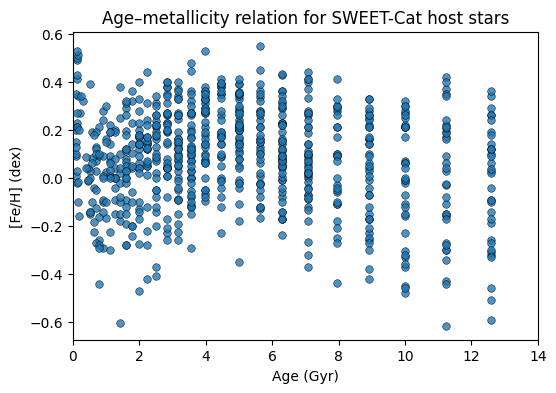

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- paths ---
root_path = Path.cwd()
while not (root_path / "topics").exists():
    root_path = root_path.parent

topic_root = root_path / "topics/TOP_0001_exoplanet_birth_radius"
ages_path  = topic_root / "data/processed/sweetcat_ages_grid.csv"
sweet_path = topic_root / "data/raw/sweetcat.csv"

# --- load data ---
ages  = pd.read_csv(ages_path)
sweet = pd.read_csv(sweet_path)

# --- select valid ages ---
ages = ages[
    (ages["fit_ok"] == True) &
    (ages["age_gyr"] >= 0.1) &
    (ages["age_gyr"] <= 13.5)
][["Name", "age_gyr"]].copy()

# --- merge with metallicity ---
sweet = sweet[["Name", "[Fe/H]"]].copy()
df = pd.merge(ages, sweet, on="Name", how="inner")
df = df.dropna(subset=["age_gyr", "[Fe/H]"])

# --- plot ---
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(
    df["age_gyr"],
    df["[Fe/H]"],
    s=30,
    color="tab:blue",
    edgecolors="k",
    linewidths=0.4,
    alpha=0.8
)

ax.set_xlabel("Age (Gyr)")
ax.set_ylabel(r"[Fe/H] (dex)")
ax.set_title("Age–metallicity relation for SWEET-Cat host stars")

ax.set_xlim(0, 14)

# --- save ---
save_fig("Figure_4", fig=fig)
plt.show()

## Interpretation and conclusions

The diagram reveals a broad age–metallicity relation characterized by significant scatter. Younger stars tend to be more metal-rich on average, while older stars preferentially occupy lower metallicities, consistent with the gradual chemical enrichment of the Galactic disk. The large dispersion at fixed age reflects the combined effects of radial migration, local star formation history, and measurement uncertainties.

Importantly, planet-hosting stars are found across a wide range of ages and metallicities, indicating that planet formation has occurred throughout most of the Galaxy’s history and under diverse chemical conditions. This scatter motivates the reconstruction of stellar birth radii, as stars observed at the solar neighborhood today may have formed at very different Galactocentric distances.

*Figure 4. Age–metallicity relation for SWEET-Cat host stars.*

# Figure 5. Reconstruction of $r_{\text{birth}}$ 


If use metallicity model ((ISM) as:
$$ [Fe/H]_{ISM}(r,t)=[Fe/H]_{ISM}(r_{\odot},t)+\bigg(\frac{d[Fe/H]_{ISM}}{dr}\bigg)(t)(r-r_{\odot})$$

then for each star with known t(age) and [Fe/H] we can calculate the reverse problem:
$$ r_{birth}=r_{\odot}+\frac{[Fe/H]_{\star}-[Fe/H]_{ISM}(r_{\odot},t)}{d[Fe/H]_{ISM}/dr)(t)}$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---------- paths ----------
root_path = Path.cwd()
while not (root_path / "topics").exists():
    root_path = root_path.parent

topic_root = root_path / "topics/TOP_0001_exoplanet_birth_radius"
ages_path  = topic_root / "data/processed/sweetcat_ages_grid.csv"
out_path   = topic_root / "data/processed/sweetcat_rbirth_toy.csv"

ages = pd.read_csv(ages_path)

# ---------- inputs we expect ----------
# columns: Name, [Fe/H], age_gyr, fit_ok  (и т.п.)
if "[Fe/H]" not in ages.columns:
    raise KeyError("Expected column '[Fe/H]' in ages table.")
if "age_gyr" not in ages.columns:
    raise KeyError("Expected column 'age_gyr' in ages table.")

df = ages.copy()

# keep only OK ages + a reasonable age window (как вы уже делали)
df = df[(df["fit_ok"] == True)].copy()
df = df[(df["age_gyr"] >= 0.1) & (df["age_gyr"] <= 13.5)].copy()
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=["age_gyr", "[Fe/H]"]).copy()

# ---------- toy ISM model (editable knobs) ----------
R_SUN = 8.0  # kpc

def grad_dfeh_dr(age_gyr: np.ndarray) -> np.ndarray:
    """
    Toy model for ISM metallicity gradient evolution.
    Constraints motivated by literature: ~ -0.07 today; steeper (~ -0.15) early.
    """
    age = np.asarray(age_gyr, dtype=float)
    # smooth monotonic evolution from -0.07 (young) to -0.15 (old)
    g0 = -0.07
    g_old = -0.15
    # shape parameter: where it transitions (in Gyr)
    t0 = 8.0
    return g0 + (g_old - g0) * (age / (age + t0))

def feh_ism_at_solar_radius(age_gyr: np.ndarray) -> np.ndarray:
    """
    Toy model for [Fe/H]_ISM at R_sun vs lookback time (age).
    We enforce: ~0 dex at age~0, and ~-0.6 dex at age~12-13 Gyr (tunable).
    """
    age = np.asarray(age_gyr, dtype=float)
    feh_now = 0.00
    feh_old = -0.60
    tau = 3.5  # controls early rapid enrichment; tune if needed
    x = np.log1p(age / tau) / np.log1p(13.0 / tau)
    return feh_now + (feh_old - feh_now) * x

# ---------- compute rbirth ----------
age = df["age_gyr"].to_numpy(dtype=float)
feh = df["[Fe/H]"].to_numpy(dtype=float)

grad = grad_dfeh_dr(age)                      # dex/kpc (negative)
feh_sun_t = feh_ism_at_solar_radius(age)      # dex

rbirth = R_SUN + (feh - feh_sun_t) / grad     # kpc

df["rbirth_kpc"] = rbirth
df["grad_dfeh_dr_toy"] = grad
df["feh_ism_rsun_toy"] = feh_sun_t

# optional: clip to a plausible disk range (to avoid “лишних вопросов”)
df["rbirth_kpc_clipped"] = df["rbirth_kpc"].clip(lower=0.5, upper=20.0)

# ---------- save ----------
out_path.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(out_path, index=False)
print("Saved:", out_path)
print("Rows:", len(df))
print(df["rbirth_kpc_clipped"].describe())

# ---------- quick sanity plot ----------
plt.figure(figsize=(7,4))
plt.hist(df["rbirth_kpc_clipped"], bins=30)
plt.xlabel(r"$r_{\rm birth}$ (kpc) [toy, clipped]")
plt.ylabel("Count")
plt.title("SWEET-Cat: reconstructed birth radii (toy model)")
plt.show()

----

## 2. Practicum 1 Metallicity gradient: [Fe/H] vs Galactocentric radius
### 2.1 What we want to show
- That the inner Galaxy is richer in metals.
- That this gradient evolved over time.
### 2.2 Axes and data
- X-axis: Galactocentric radius R (kpc)
- Y-axis: metallicity [Fe/H]
- Several curves or point clouds for different epochs:
- 10 Gyr
- 6–8 Gyr
- < 4 Gyr
### 2.3 Interpretation
- In early epochs, planets were possible only close to the Galactic center.
- Over time, the “planet-forming zone” expanded outward.

📌 Narrative:
*The Galaxy first learned how to make metals — and only then how to make planets.*


## 3. Practicum 2 Evolution of planetary building blocks
### 3.1 What we visualize
Individual elements or groups:
- Fe — planetary cores and gas giants
- Mg + Si — silicate planets
- O + C — ices and volatile components
### 3.2 Plot format
- X-axis: R (kpc)
- Y-axis: elemental abundances
- Multiple epochs
### 3.3 Why this matters
- To show that different types of planets “switch on” at different times.
- To explain why gas giants are more sensitive to Galactocentric radius than super-Earths.

📌 Narrative:
*Not all planets are possible everywhere and at all times.*


## 4. Practicum 3 Birth radius: where planetary systems were actually born
### 4.1 What we compare
Birth radius $r_{birth}$ for stars:
- with planets,
- without planets.
### 4.2 Plot type
KDEs or histograms:
- X-axis: $r_{birth}$
- Y-axis: density
### 4.3 Expected result
Planet-hosting systems are shifted toward smaller $r_{birth}$.
The effect is especially strong for massive planets.

📌 Narrative:
*We observe planets far from where they were born.*


## 5. Practicum 4 Planet formation efficiency vs r₍birth₎
### 5.1 Definition
Planet formation efficiency = the relative fraction of stars hosting planets at a given r₍birth₎.
### 5.2 Plot
X-axis: $r_{birth}$
Y-axis: relative frequency
Two curves:
massive planets,
low-mass planets.
### 5.3 Interpretation
A steep decline in efficiency with increasing $r_{birth}$ for gas giants.
A much flatter dependence for small planets.

📌 Narrative:
*Giants are the children of the Galaxy’s wealthy neighborhoods.*


## 6. Practicum 5 Stellar migration: a schematic, not precise dynamics
### 6.1 Important note
This is not a numerical orbit calculation, but a conceptual visualization.
### 6.2 What we draw
Radius axis $R$
Arrows:
$r_{birth}$ → $R_{now}$
Several representative trajectories:
- inner → outer disk,   
- moderate migration,
- almost no migration.
### 6.3 Why this is needed
To show why chemistry and present-day position do not match.
To link $r_{birth}$ with observations.

📌 Narrative:
*The Galaxy is a system of currents.*


## 7. Minimal Python stack (if we move to code)
If we decide to actually generate the plots:
- numpy,
- pandas,
- matplotlib (no 3D),
- scipy (KDE).

Data sources:
- synthetic data (for conceptual clarity), or
- real catalogs: SWEET-Cat / HARPS.

👉 At the first stage, synthetic data are sufficient to convey the idea.


## 8. What immediately feeds into content
Academy: all plots with full explanations.

Celestial Chronicles: 2–3 plots plus schematic diagrams.

Astro Minute: 1 plot + 1 key sentence.

Stellar Attractor Universe: the logic of migrating worlds.


## 9. Final takeaway of the practicum
If we combine:
- GCE,
- birth radius,
- stellar migration,
- and these visualizations, 

then exoplanets stop being a random collection of discoveries, and become a natural outcome of the Milky Way’s evolution.


## Various service cells